# Importing and Understanding data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# reading csv file
data = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [5]:
data.shape

(730, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# checking for the null values in each column

data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dropping unwanted columns
      
* Let us drop **instant** coz it is just the index for each row , **dteday** coz it only shows date which can be observed with the help of *yr* and *mnth* column , **casual** and **registered** column because combination of these two shows *cnt* column.

In [9]:
# dropping columns
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

Renaming column for better readability

In [10]:
data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

Converting numerical value into specified categorical value.

In [11]:
# Mapping numerical values of season to specified labels.
data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [12]:
# Mapping numerical values of month to specified labels.
data.month = data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [13]:
# Mapping numerical values of weekday to specified labels.
data.weekday  = data.weekday .map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [14]:
# Mapping numerical values of weathersit to specified labels.
data.weathersit = data.weathersit.map({1:'Clear',2:'Mist',3:'Light_snow_rain',4:'Heavy_snow_rain'})

In [15]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualising Data

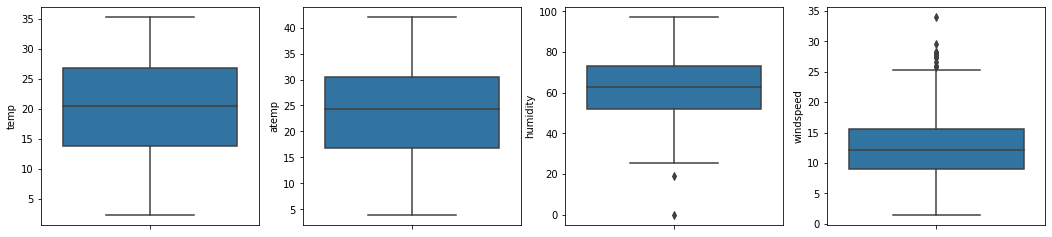

In [16]:
# Draw box plots for independent variables with continuous values
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=data)
    i+=1

From above, we can say that there are no outliers to be handled. So we can proceed with this values.

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

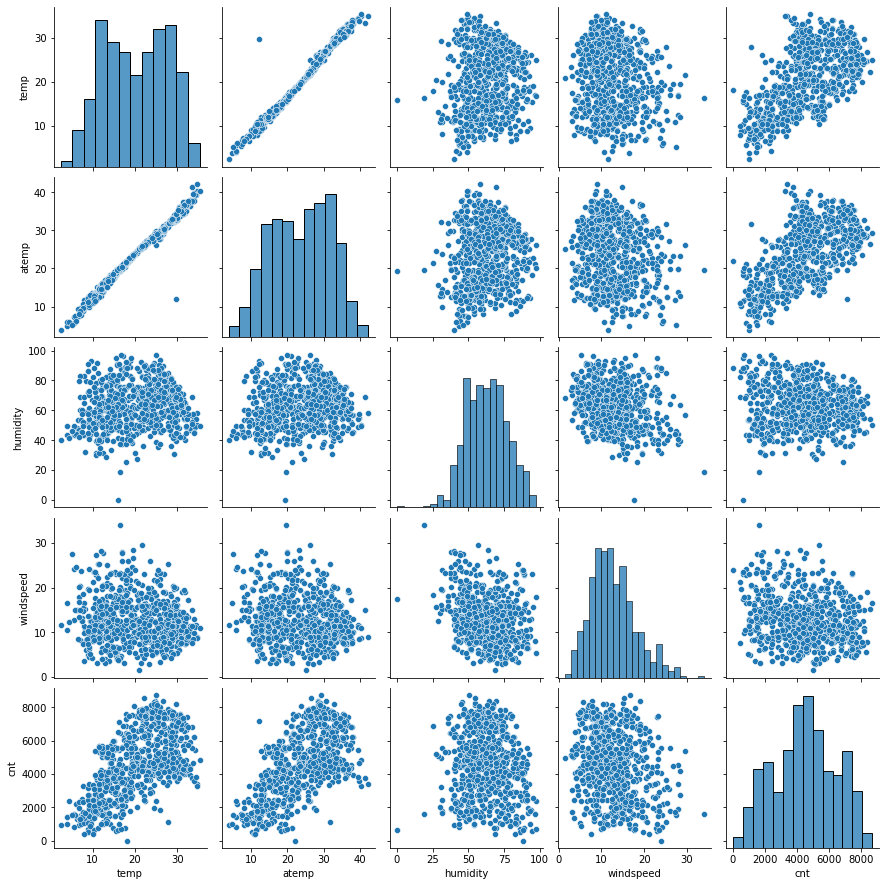

In [17]:
sns.pairplot(data=data,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

From above, we can say that temp and atemp has highest correlation with the target variable 'cnt'. And it is also observed that temp and atemp are highly correlated with each other.

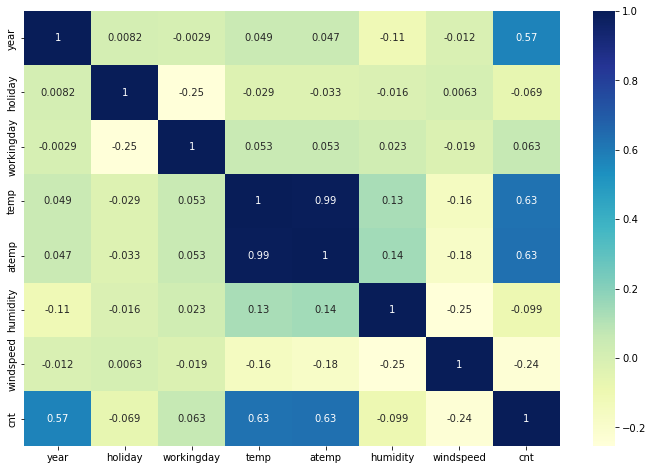

In [18]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

From above we can say that, temp and atemp are highly correlated means both the variables together cannot be used in model because it will lead to multicollinearity. So from Variance Inflation Factor(VIF) and p-value we will consider which variable to take.

In [19]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualising Categorical Variables

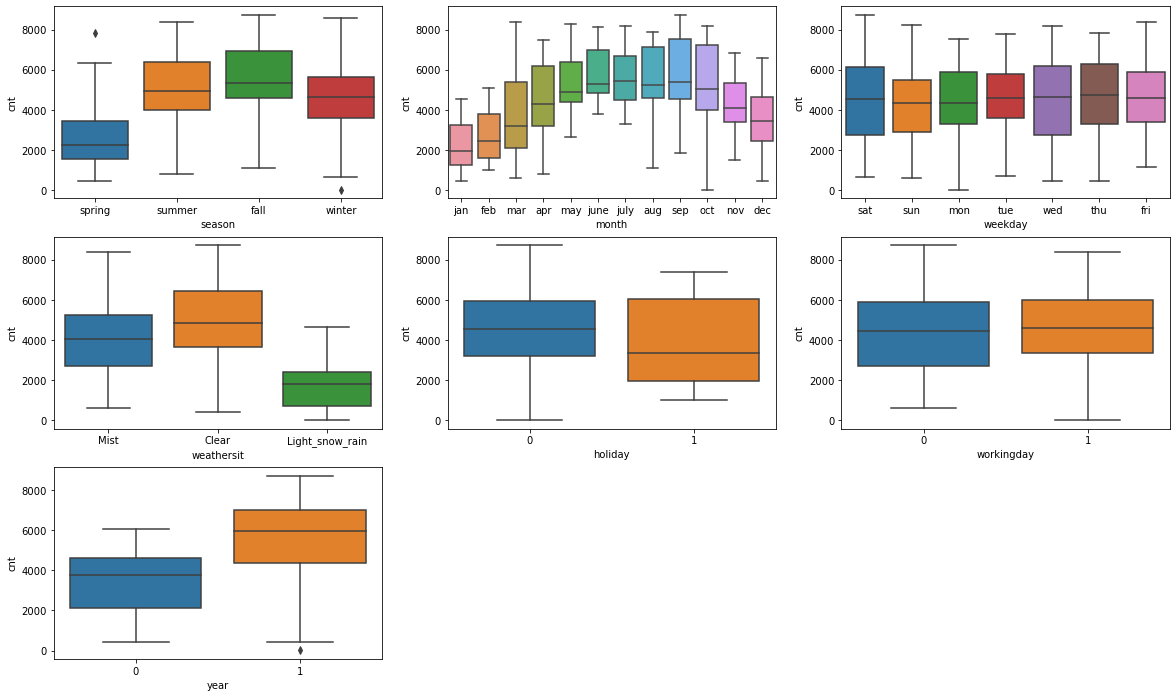

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'year', y = 'cnt', data = data)
plt.show()

From above plots we can draw many insights such as:

    1.Season: Fall has highest demand for rental bikes
    2.Every month the demand for rental bike is increasing till June.
    3.September has the highest number of demand then it is decreasing.
    4.During weekdays and workingdays demands don't have that much of variation.
    5.Clear weathersit has highest demand
    6.When there is a holiday, demand has decreased.
    7.We see that demand for next year has grown.

## Data Preparation

Dummy Variables

In [22]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
# creating dummy values for all categorical variables

data = pd.get_dummies(data=data,columns=["season","month","weekday","weathersit"],drop_first=True)

In [24]:
data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# printing columns 
data.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_july',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snow_rain',
       'weathersit_Mist'],
      dtype='object')

## Model Building

#### Splitting the Data into Training and Testing Sets

In [26]:
# splitting the dataframe into train and test
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
# checking the shape of train dataset
df_train.shape

(510, 30)

In [28]:
# checking the shape of test dataset
df_test.shape

(219, 30)

#### Rescaling the Features

In [29]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [30]:
# verifying the head of dataset before scaling.
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [31]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [33]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


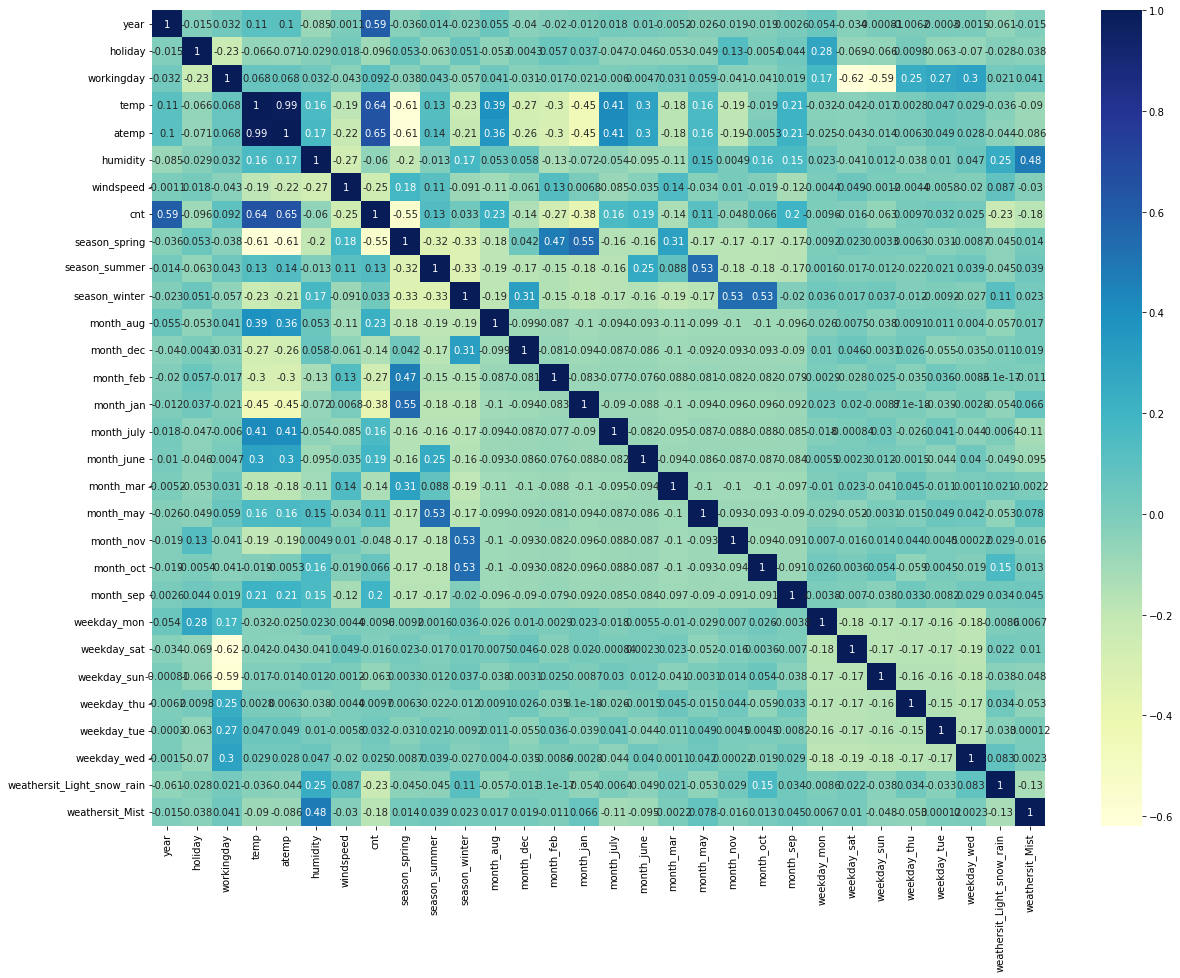

In [34]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From this we can say that, year and temp seems correlated with cnt the most. Let's see a regplot for temp vs cnt.

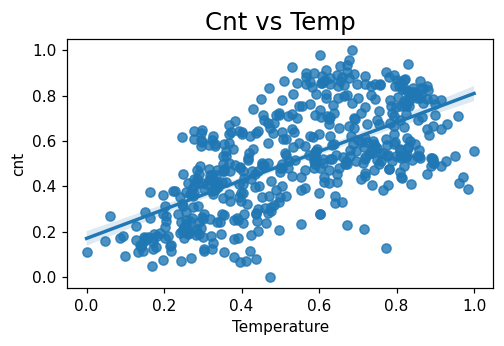

In [35]:
plt.figure(figsize=(5,3),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=df_train,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

From above visualization we can say that cnt and temp are having positive correlation.

#### Dividing into X and Y sets for the model building

In [36]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [39]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', False, 7),
 ('month_dec', False, 3),
 ('month_feb', False, 4),
 ('month_jan', True, 1),
 ('month_july', True, 1),
 ('month_june', False, 14),
 ('month_mar', False, 15),
 ('month_may', False, 6),
 ('month_nov', False, 2),
 ('month_oct', False, 11),
 ('month_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_Light_snow_rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [40]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_jan',
       'month_july', 'month_sep', 'weekday_sat', 'weathersit_Light_snow_rain',
       'weathersit_Mist'],
      dtype='object')


In [41]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'month_aug', 'month_dec', 'month_feb', 'month_june',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [42]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [43]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
14,weathersit_Mist,2.29
0,year,2.09
12,weekday_sat,1.98


humidity shows high VIF value. even temp. But don't drop both together. lets drop humidity first after building a linear model and then check the VIF of temp

### Building a linear model

In [45]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Fri, 03 Feb 2023   Prob (F-statistic):          2.31e-191
Time:                        02:10:58   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [46]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_spring,3.08
6,season_summer,2.33
0,year,2.08
7,season_winter,1.99
11,weekday_sat,1.97
8,month_jan,1.62
9,month_july,1.59


In [47]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Fri, 03 Feb 2023   Prob (F-statistic):          7.33e-189
Time:                        02:13:49   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Dropping based on P value

In [48]:
# We can drop holiday variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,season_spring,2.99
5,season_summer,2.31
0,year,2.08
6,season_winter,1.92
10,weekday_sat,1.84
7,month_jan,1.62
8,month_july,1.59


In [49]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Fri, 03 Feb 2023   Prob (F-statistic):          4.11e-189
Time:                        02:15:46   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [50]:
# We can drop month_jan variable as it has high p-value
X_train_new = X_train_new.drop(['month_jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,season_spring,2.38
5,season_summer,2.31
0,year,2.07
6,season_winter,1.92
9,weekday_sat,1.83
7,month_july,1.58
11,weathersit_Mist,1.56


In [51]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Fri, 03 Feb 2023   Prob (F-statistic):          3.28e-189
Time:                        02:17:02   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [52]:
# We can drop month_july variable as it has high p-value
X_train_new = X_train_new.drop(['month_july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,season_spring,2.30
0,year,2.07
5,season_summer,1.99
8,weekday_sat,1.83
6,season_winter,1.77
10,weathersit_Mist,1.56
7,month_sep,1.23


Notice the significant change in **temp** feature after dropping *month_july* 

In [53]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Fri, 03 Feb 2023   Prob (F-statistic):          6.86e-189
Time:                        02:19:25   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [54]:
# We can drop season_spring variable as it has high p-value
X_train_new = X_train_new.drop(['season_spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,year,2.02
7,weekday_sat,1.69
4,season_summer,1.57
9,weathersit_Mist,1.53
5,season_winter,1.40
6,month_sep,1.20
8,weathersit_Light_snow_rain,1.08


Post this drop all features are within acceptable VIF range

In [55]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Fri, 03 Feb 2023   Prob (F-statistic):          1.47e-188
Time:                        02:20:49   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

###### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

# Residual Analysis of the train data

In [56]:
# Checking the parameters and their coefficient values
lr_6.params

const                         0.075325
year                          0.233056
workingday                    0.056323
temp                          0.549936
windspeed                    -0.155238
season_summer                 0.087429
season_winter                 0.131826
month_sep                     0.097236
weekday_sat                   0.067688
weathersit_Light_snow_rain   -0.288021
weathersit_Mist              -0.081347
dtype: float64

In [57]:
y_train_pred = lr_6.predict(X_train_lm_6)

###### Normality of error terms

Text(0.5, 0, 'Errors')

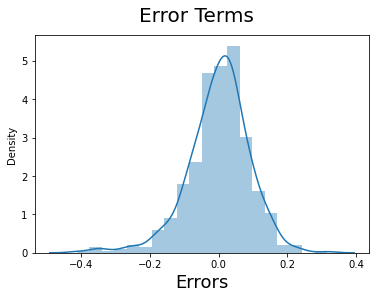

In [58]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

From above plot we can say that Error terms are normally distributed

###### Multicollinearity Check

In [59]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,year,2.02
7,weekday_sat,1.69
4,season_summer,1.57
9,weathersit_Mist,1.53
5,season_winter,1.40
6,month_sep,1.20
8,weathersit_Light_snow_rain,1.08


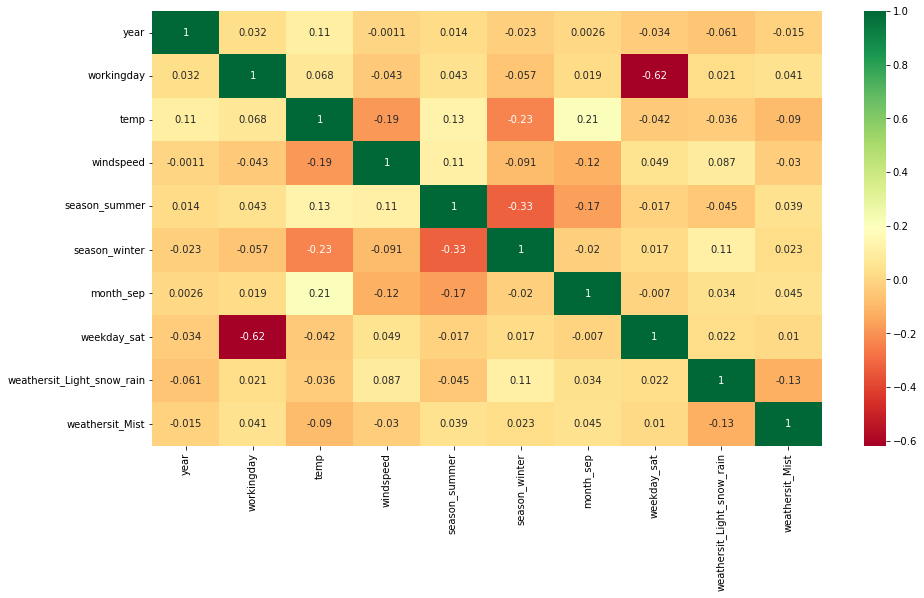

In [60]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

**From above heatmap, we can observe that there is no multicollinearity.**

###### Homoscedasticity Check

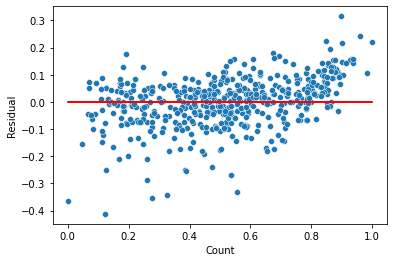

In [62]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

From above plot we can observe that there is no visible pattern formed.

# Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixth model.

#### Applying the scaling on the test sets

In [63]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [64]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [65]:
y_test = df_test.pop('cnt')
X_test = df_test

In [66]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [67]:
y_pred = lr_6.predict(X_test_lm_6)

In [68]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7956

## Model Evaluation

Text(0, 0.5, 'y_pred')

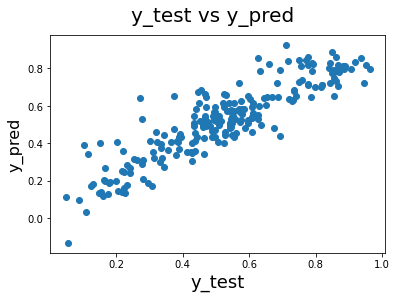

In [69]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [70]:
round(lr_6.params,4)

const                         0.0753
year                          0.2331
workingday                    0.0563
temp                          0.5499
windspeed                    -0.1552
season_summer                 0.0874
season_winter                 0.1318
month_sep                     0.0972
weekday_sat                   0.0677
weathersit_Light_snow_rain   -0.2880
weathersit_Mist              -0.0813
dtype: float64

**We can see that the equation of our best fitted line is:**

cnt = 0.0753 + 0.2331 * year + 0.0563 * workingday + 0.5499 * temp - 0.1552 * windspeed + 0.0872 * season_summer + 0.1318 * season_winter + 0.0972 * month_sep + 0.0677 * weekday_sat - 0.2880 * weathersit_Light_snow_rain - 0.0813 * weathersit_Mist

In [71]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7858


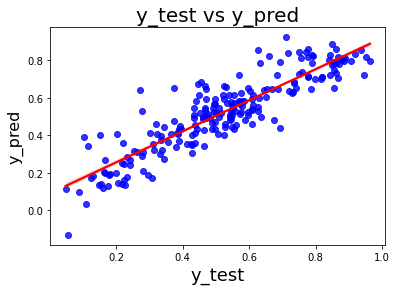

In [72]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Comparison between Training and Testing Dataset

* Train dataset R^2 = 0.836
* Train dataset Adjusted R^2 = 0.832
* Test dataset R^2 = 0.7956
* Test dataset Adjusted R^2 = 0.7858

**Thus we can conclude that Demand of bikes depend on year , workingday , temp , windspeed , season_summer , season_winter , month_sep , weekday_sat , weathersit_Light_snow_rain , weathersit_Mist**